<a href="https://colab.research.google.com/github/Nayanajo99/test/blob/main/second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A classification problem. We'll build a model to classify whether a person has diabetes based on features like age, BMI, and glucose level.

 Set Up the Environment
import the necessary Python libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Create the Dataset:
 create a synthetic dataset. For simplicity, we will create a small dataset manually:

In [3]:
# Creating a simple dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'BMI': [18.5, 24.0, 30.0, 35.0, 24.5, 28.0, 32.0, 31.0, 29.0, 36.5],
    'Glucose': [85, 90, 95, 100, 110, 115, 130, 140, 150, 160],
    'Diabetes': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0: No diabetes, 1: Has diabetes
}

df = pd.DataFrame(data)
print(df)


   Age   BMI  Glucose  Diabetes
0   25  18.5       85         0
1   30  24.0       90         0
2   35  30.0       95         0
3   40  35.0      100         0
4   45  24.5      110         1
5   50  28.0      115         1
6   55  32.0      130         1
7   60  31.0      140         1
8   65  29.0      150         1
9   70  36.5      160         1


Data Exploration
You can inspect the data to ensure it's correctly loaded:

In [4]:
print(df.describe())


             Age        BMI     Glucose   Diabetes
count  10.000000  10.000000   10.000000  10.000000
mean   47.500000  28.850000  117.500000   0.600000
std    15.138252   5.400874   26.273138   0.516398
min    25.000000  18.500000   85.000000   0.000000
25%    36.250000  25.375000   96.250000   0.000000
50%    47.500000  29.500000  112.500000   1.000000
75%    58.750000  31.750000  137.500000   1.000000
max    70.000000  36.500000  160.000000   1.000000


 Data Preprocessing
Standardize the feature values to ensure that each feature contributes equally to the distance calculations in the model:

In [5]:
# Features and target variable
X = df[['Age', 'BMI', 'Glucose']]  # Features (independent variables)
y = df['Diabetes']  # Target variable (dependent variable)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Model
train a logistic regression model:



In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Make Predictions
Use the trained model to predict whether individuals in the test set have diabetes:



In [7]:
# Predict diabetes status for the test set
y_pred = model.predict(X_test)
print("Predicted Diabetes Status:", y_pred)
print("Actual Diabetes Status:", y_test.values)


Predicted Diabetes Status: [1 0]
Actual Diabetes Status: [1 0]


Evaluate the Model
Evaluate the model's performance using accuracy, confusion matrix, and a classification report:

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Visualize the Confusion Matrix
Visualizing the confusion matrix can help you understand how well the model is performing:

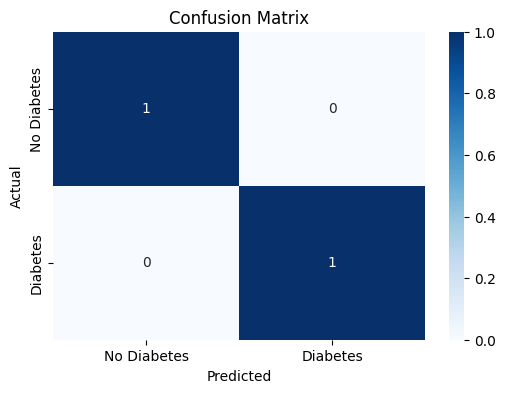

In [9]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Import the necessary libraries (if not already done)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Let's assume the model and scaler have already been trained.
# You can include the full training code from the previous steps if needed.

# Allow the user to enter new data
age = float(input("Enter Age: "))
bmi = float(input("Enter BMI: "))
glucose = float(input("Enter Glucose level: "))

# Combine the user inputs into a NumPy array
new_data = np.array([[age, bmi, glucose]])

# Standardize the new data using the same scaler
new_data_standardized = scaler.transform(new_data)

# Predict diabetes status for the new data point
new_prediction = model.predict(new_data_standardized)
new_prediction_proba = model.predict_proba(new_data_standardized)

# Output the prediction
diabetes_status = "Diabetes" if new_prediction[0] == 1 else "No Diabetes"
print(f'\nPredicted Diabetes Status: {diabetes_status}')
print(f'Prediction Probability: {new_prediction_proba[0]}')


Enter Age: 28
Enter BMI: 80
Enter Glucose level: 200

Predicted Diabetes Status: Diabetes
Prediction Probability: [0.49126712 0.50873288]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
